# Algorithms - Graphs

## Exercise 1: Graph Making

### 1.1: Write a function called make_simple_graph that returns the graph object that represents the following diagram:

![ex2](../assets/exercise2.png)

In [29]:
# exercise 1.1

# Import the NetworkX library

import networkx as nx

# Define the graph as a dictionary where each node maps to a set of its neighbors

graph1 = {
    'B': set(['D']),
    'D': set(['B', 'E', 'A']),
    'E': set(['D', 'A', 'C']),
    'C': set(['E', 'A']),
    'A': set(['D', 'C', 'E']),
}

def make_simple_graph(graph):
    
    # Create a NetworkX graph object from the dictionary
    
    G = nx.Graph(graph)
    
    # Draw the graph using NetworkX's draw function

    nx.draw(G, with_labels=True, node_color='red', edge_color='black')
    return G

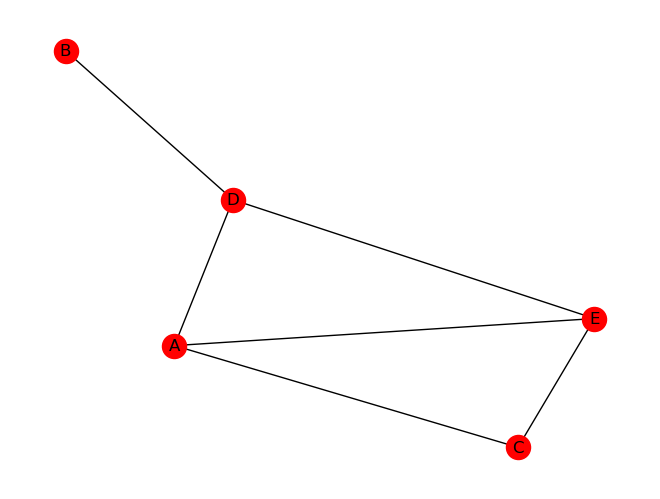

In [30]:
# Call the function to create and display the graph

make_simple_graph(graph1)

### 1.2: computing node degrees of graphs

For the graph made by your function in the previous exercise, calculate the degrees of each node, and visually confirm those values by inspecting the above graph. Write a function `compute_degrees` which takes a networkx graph object as input, and returns a `dict` with the degrees of all the nodes in the graph.

**NOTE:** You cannot use the diameter or degree method from networkx directly to compute the degrees.

```
compute_degrees(G) -> {
    'degree_A': 3,
    'degree_B': 1,
    'degree_C': 2,
    'degree_D': 3,
    'degree_E': 3,
}
```

{'degree_B': 1, 'degree_D': 3, 'degree_E': 3, 'degree_C': 2, 'degree_A': 3}


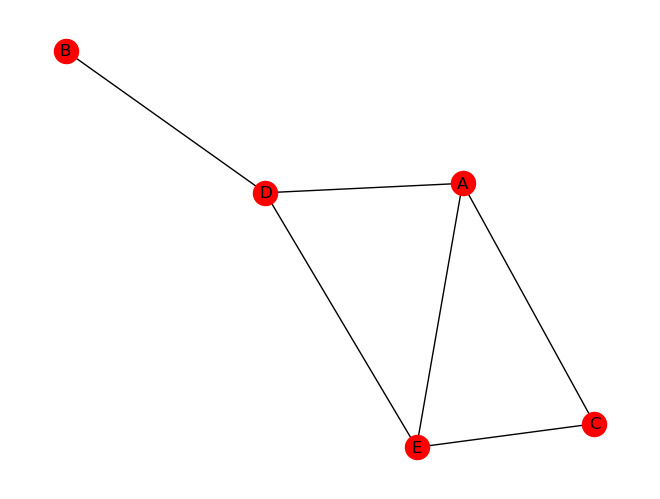

In [42]:
# exercise 1.2

# Function to compute the degrees of each node in the graph

def compute_degrees(G):
    
    # Initialize an empty dictionary to store degrees
    
    degrees = {}  
    for node in G.nodes():  
        
         # Calculate the degree of the node (number of neighbors)
            
        degree = len(list(G.neighbors(node))) 
        
        # Store the degree in the dictionary
        
        degrees[f'degree_{node}'] = degree  
    return degrees

# Create the graph using the previously defined function

G = make_simple_graph(graph1)

# Compute the degrees of each node in the graph

node_degrees = compute_degrees(G)

# Print the degrees of each node

print(node_degrees)

### 1.3: An airline route map graph

CBDS Airlines has the following route map for the cities that it services, where every pair of cities has service in both directions between the cities:

```
routemap =  [('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'), ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'), ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'), ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'), ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'), ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'), ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'), ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'), ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'), ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'), ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')]

```

Copy this data into a networkX graph to answer the question.

1. What is the maximum number of hops that would ever be taken by a passenger on a single trip between any two serviced cities?

2. If you were a rich jet-setter traveling everywhere in across the country and were constrained to fly CBDS, which city would be the most optimal place for you to live, to minimize the number of hops you would have to make on average as you jet from home to your latest vacation spot?


In [46]:
# exercise 1.3

# Define the route map as a list of tuples representing the routes between cities

routemap = [
    ('St. Louis', 'Miami'), ('St. Louis', 'San Diego'), ('St. Louis', 'Chicago'),
    ('San Diego', 'Chicago'), ('San Diego', 'San Francisco'), ('San Diego', 'Minneapolis'),
    ('San Diego', 'Boston'), ('San Diego', 'Portland'), ('San Diego', 'Seattle'),
    ('Tulsa', 'New York'), ('Tulsa', 'Dallas'), ('Phoenix', 'Cleveland'),
    ('Phoenix', 'Denver'), ('Phoenix', 'Dallas'), ('Chicago', 'New York'),
    ('Chicago', 'Los Angeles'), ('Miami', 'New York'), ('Miami', 'Philadelphia'),
    ('Miami', 'Denver'), ('Boston', 'Atlanta'), ('Dallas', 'Cleveland'),
    ('Dallas', 'Albuquerque'), ('Philadelphia', 'Atlanta'), ('Denver', 'Minneapolis'),
    ('Denver', 'Cleveland'), ('Albuquerque', 'Atlanta'), ('Minneapolis', 'Portland'),
    ('Los Angeles', 'Seattle'), ('San Francisco', 'Portland'), ('San Francisco', 'Seattle'),
    ('San Francisco', 'Cleveland'), ('Seattle', 'Portland')
]

# Create the graph from the route map

G = nx.Graph()
G.add_edges_from(routemap)

# Function to compute the maximum number of hops (longest shortest path)

def compute_max_hops(G):
    
    # Get shortest path lengths between all pairs of nodes
    
    lengths = dict(nx.all_pairs_shortest_path_length(G))
    
    # Find the maximum length (the longest shortest path)
    
    max_hops = max(max(lengths[node].values()) for node in lengths)
    return max_hops

# Function to find the most optimal city to minimize the average number of hops

def find_optimal_city(G):
    
    # Dictionary to store average shortest path length for each node
    
    avg_path_lengths = {}
    
    for node in G.nodes():
        
        # Compute shortest path lengths from the current node to all other nodes
        
        lengths = nx.single_source_shortest_path_length(G, node)
        
        # Calculate the average shortest path length for the current node
        
        avg_length = sum(lengths.values()) / (len(G.nodes()) - 1)
        avg_path_lengths[node] = avg_length
    
    # Find the city with the minimum average shortest path length
    
    optimal_city = min(avg_path_lengths, key=avg_path_lengths.get)
    return optimal_city

# Compute the maximum number of hops

max_hops = compute_max_hops(G)
print(f"The maximum number of hops: {max_hops}")

# Find the most optimal city to live in

optimal_city = find_optimal_city(G)
print(f"The most optimal city to live in: {optimal_city}")

The maximum number of hops: 5
The most optimal city to live in: San Diego
